<h2 align="center">Projeto 4</h2>
<p align="center">
  Matéria: Álgebra Linear Numérica<br>
  Professor: Bernardo Freitas<br>
  Alunos: Bruno Ferreira Salvi e Elisa de Oliveira Soares<br>
  Data: 06/2025
</p>


Imports ao longo do trabalho:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import time
from scipy.special import kv  
from scipy.stats import norm

### Questão 1. Matrizes Gaussianas. Uma matriz gaussiana tem todas as entradas Aij independentes e distribuídas segundo uma normal padrão, ou seja, Aij ∼ N (0, 1).

### a) Distribuição das normas. Faça um histograma da norma-2 das colunas de uma matriz gaussiana A, m × n. Use vários valores de m, e comente o que você observa.

Text(0.5, 1.02, 'Histograma das normas-2 das colunas de uma matriz gaussiana')

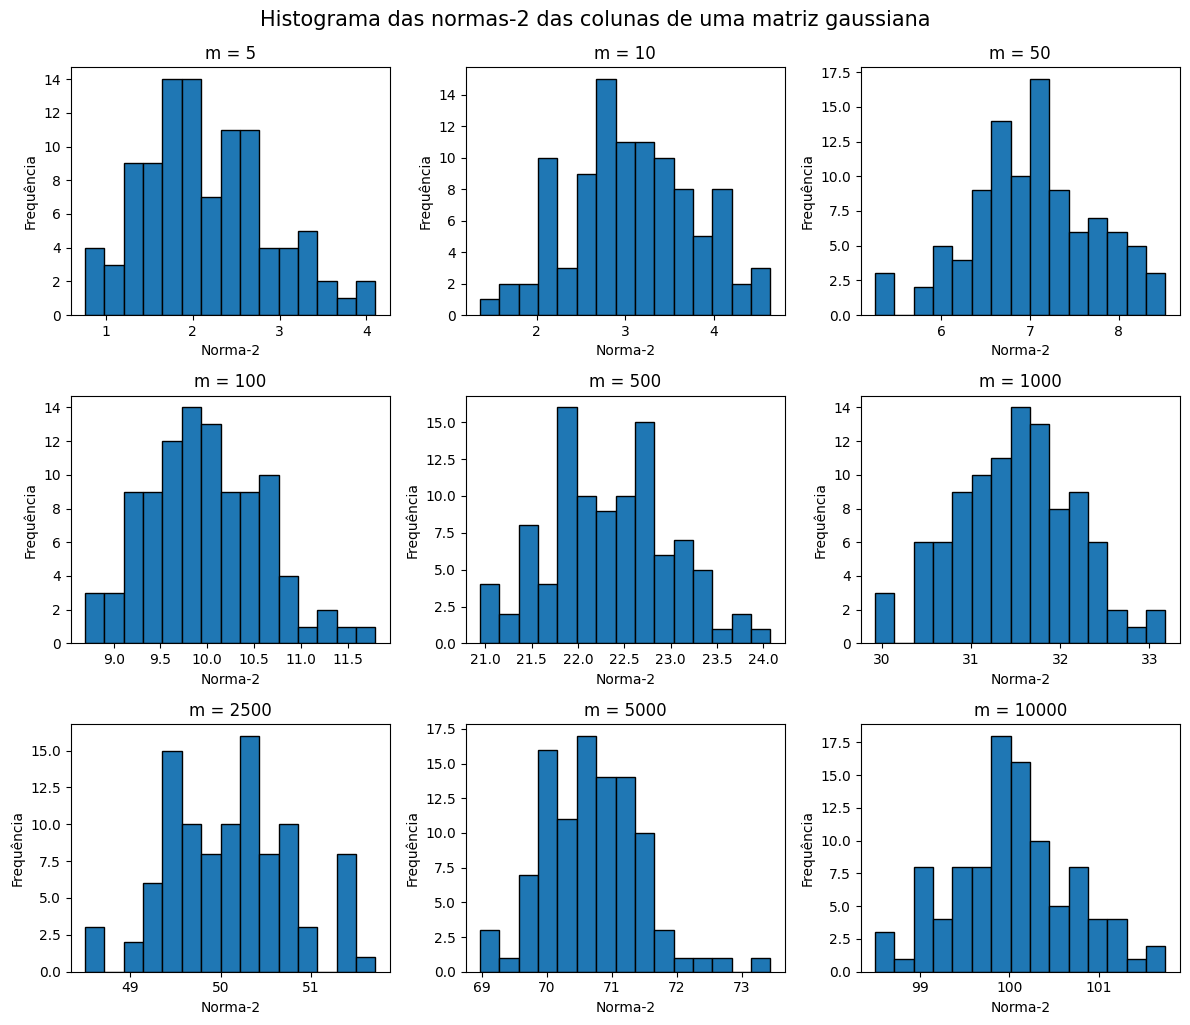

In [2]:
m_s = [5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
i=0

plt.figure(figsize=(12, 10))

for m in m_s:
    A = np.random.normal(0, 1, size=(m, 100)) # ESCOLHER UM n
    
    # Calcula norma-2 das colunas
    normas = np.linalg.norm(A, axis=0)
    i += 1
    
    # Plota histograma
    plt.subplot(3, 3, i)
    plt.hist(normas, bins=15, edgecolor='black')
    plt.title(f"m = {m}")
    plt.xlabel("Norma-2")
    plt.ylabel("Frequência")

plt.tight_layout()
plt.suptitle("Histograma das normas-2 das colunas de uma matriz gaussiana", fontsize=15, y=1.02)

Ao observarmos os historiogramas, é possível perceber que o valor da norma-2 das colunas é próximo de $\sqrt{m}$. Isso ocorre pois a norma dois de um vetor é $\sqrt{a_1^2 + a_2^2 + \dots + a_m^2}$, para um vetor $1 \times m$, que é o caso de todo vetor da nossa matriz A. Porém, na nossa matriz A, todo elemento é gerado da mesma forma ($a \sim \mathcal{N}(0, 1)$), logo a norma dois do vetor será $\sqrt{m \cdot E(a^2)}$. Como $E(a) = \mu = 0$, $Var (a) = \sigma^2 = 1$, e $Var(a) = E(a^2) - (E(a))^2$, temos que $E(a^2) = Var(a) - (E(a))^2$. Logo, $E(a^2) = 1 - 0^2 = 1$. Assim, temos que a norma 2 do vetor será sempre próximo de $\sqrt{m \cdot E(a^2)} = \sqrt{m \cdot 1}= \sqrt{m}$, como podemos observar no historiograma.

### b) Produtos internos. Agora, fixe m = 100 e faça o histograma do produto interno ⟨Ai, Aj ⟩ entre colunas de uma matriz gaussiana A. Exclua os casos i = j, e use n = 100, 200, 500 e 1000. O que acontece? Qual parece ser a distribuição para n → ∞?

n = 100
Média empírica: 0.04, Esperança teórica: 0
Desvio empírico: 9.92, Teórico: 10.00

n = 200
Média empírica: 0.07, Esperança teórica: 0
Desvio empírico: 10.00, Teórico: 10.00

n = 500
Média empírica: -0.02, Esperança teórica: 0
Desvio empírico: 9.98, Teórico: 10.00

n = 1000
Média empírica: -0.00, Esperança teórica: 0
Desvio empírico: 9.96, Teórico: 10.00



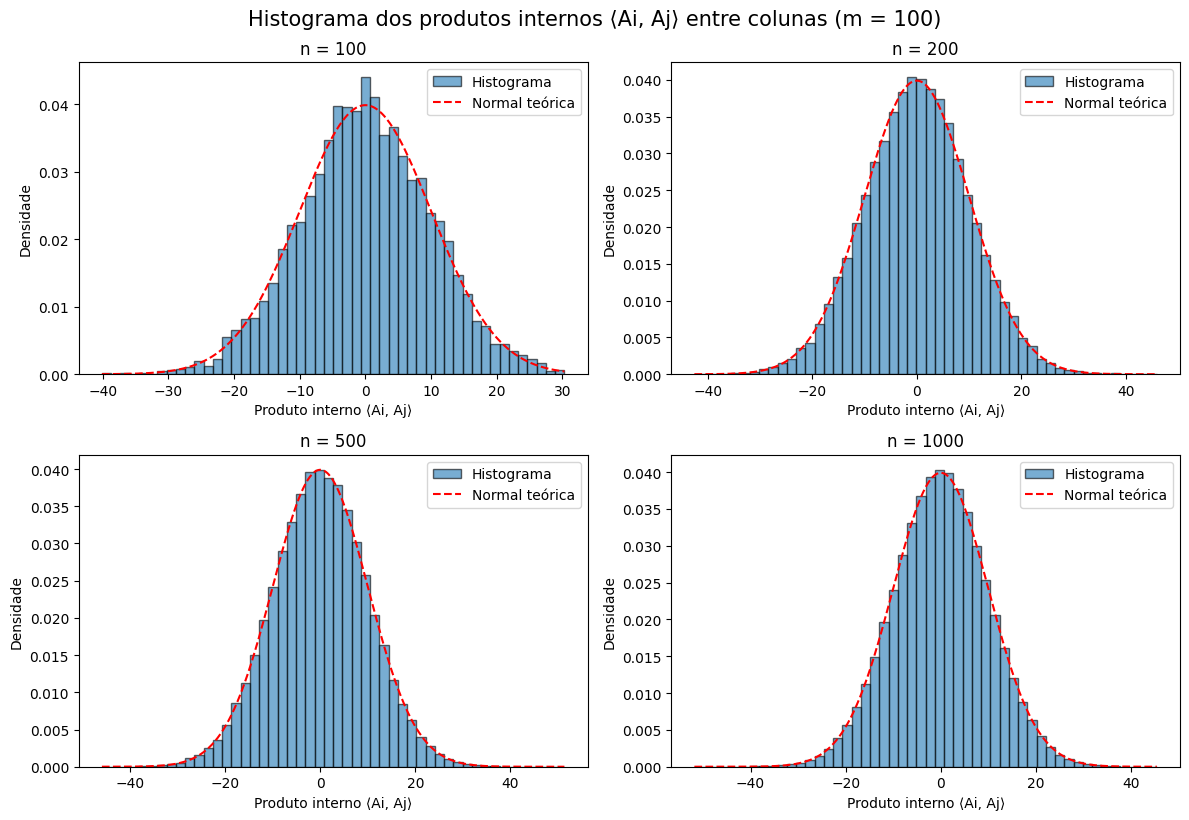

In [12]:
n_s = [100, 200, 500, 1000]
i=0

plt.figure(figsize=(12, 8))

for n in n_s:
    A = np.random.normal(0, 1, size=(100, n)) 
    
    G = A.T @ A 
    produtos_internos = G[~np.eye(n, dtype=bool)] # Remove os elementos da diagonal
    i += 1

    # Parâmetros da normal teórica
    mu = 0
    sigma = np.sqrt(100)  # Var(⟨Ai,Aj⟩) ≈ m

    # Histograma
    plt.subplot(2, 2, i)
    count, bins, _ = plt.hist(produtos_internos, bins=50, density=True, edgecolor='black', alpha=0.6, label='Histograma')

    # Curva normal teórica
    x = np.linspace(bins[0], bins[-1], 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, 'r--', label='Normal teórica')

    plt.title(f"n = {n}")
    plt.xlabel("Produto interno ⟨Ai, Aj⟩")
    plt.ylabel("Densidade")
    plt.legend()

    print(f"n = {n}")
    print(f"Média empírica: {np.mean(produtos_internos):.2f}, Esperança teórica: 0")
    print(f"Desvio empírico: {np.std(produtos_internos):.2f}, Teórico: {np.sqrt(100):.2f}")
    print()

plt.tight_layout()
plt.suptitle("Histograma dos produtos internos ⟨Ai, Aj⟩ entre colunas (m = 100)", fontsize=15, y=1.02)
plt.show()

O histograma está sendo feito com densidade, pois assim é possível visualizar a semelhança com a distribuição normal padrão e preservar a forma característica da distribuição dos produtos internos. A distribuição de $\langle A_i, A_j \rangle$, para $i \ne j$, se assemelha à distribuição normal quando $n \to \infty$. Isso pode ser provado pelo fato de que todo elemento é gerado da mesma forma ($a \sim \mathcal{N}(0, 1)$) de maneiras independentes e $\langle A_i, A_j \rangle = \sum_{k=1}^m a_{ki}a_{kj}, \forall \  i, j$. Como todo $a$ é normal, $\mathbb{E}[a] = 0, \forall \  a$, logo $\mathbb{E}[\langle A_i, A_j \rangle] = \sum_{k=1}^m \mathbb{E}[a_{ki}a_{kj}] = \sum_{k=1}^m \mathbb{E}[a_{ki}]\mathbb{E}[a_{kj}] = \sum_{k=1}^m 0 \times 0 = 0$, sendo a média de $\langle A_i, A_j \rangle$ igual a zero. Em relação à variância, temos que  $Var[XY] = \mathbb{E}[X^2] \mathbb{E}[Y^2]$, mas como todo $a$ é normal, $\mathbb{E}[a^2] = Var[a] + (\mathbb{E}[a])^2 = 1 + 0 = 1, \forall \  a$, logo  $Var[\langle A_i, A_j \rangle] = \sum_{k=1}^m Var[a_{ki}a_{kj}] = \sum_{k=1}^m \mathbb{E}[a_{ki}^2] \mathbb{E}[a_{kj}^2] = \sum_{k=1}^m 1 \times 1 = m$. Como a variância é $m$, o desvio padrão é $\sqrt{m}$; Logo, a distribuição de $\langle A_i, A_j \rangle$, para $i \ne j$, realmente se assemelha a uma normal $\mathcal{N}(0, \sqrt{m}) = \mathcal{N}(0, \sqrt{100}) = \mathcal{N}(0, 10)$.

### c) A distribuição do máximo. Queremos ver quão “não ortogonal” é a matriz A. Para isto, vamos estudar o máximo de |⟨Ai,Aj⟩| / ∥Ai∥∥Aj∥ entre colunas distintas de uma matriz gaussiana A. Para isto, gere K = 1000 matrizes gaussianas Ak de ordem 100 × 300, calcule o máximo indicado acima, e faça um histograma dos K valores obtidos.

In [4]:
k1 = 1500

# < Método com loops >
start = time.time()

hist_max_ks_loop = []

def similaridade_cosseno(a, b):
    num = np.abs(np.dot(a, b))
    den = np.linalg.norm(a) * np.linalg.norm(b)
    return num / den

for _ in range(k1):
    A = np.random.normal(0, 1, (100, 300))
    hist_ks = []
    for i in range(len(A.T)):
        for j in range(i + 1, len(A.T)):
            a = similaridade_cosseno(A[:, i], A[:, j])
            hist_ks.append(a)

    hist_max_ks_loop.append(np.max(hist_ks))

end = time.time()
tempo_loop = end - start


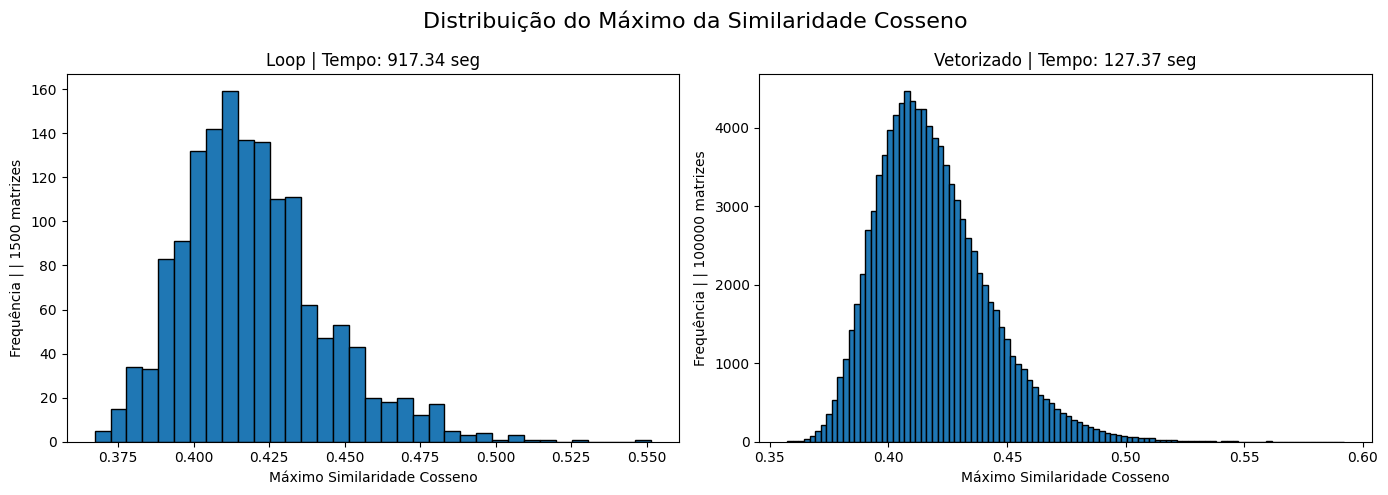

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(hist_max_ks_loop, bins=35, edgecolor='black')
axes[0].set_title(f"Loop | Tempo: {tempo_loop:.2f} seg")
axes[0].set_xlabel("Máximo Similaridade Cosseno")
axes[0].set_ylabel(f"Frequência | | {k1} matrizes")

k2 = 100000

# < Método verotizado >
start = time.time()

hist_max_ks_vec = []

for _ in range(k2):
    A = np.random.normal(0, 1, (100, 300))

    norms = np.linalg.norm(A, axis=0)
    A_normalizado = A / norms

    S = np.abs(A_normalizado.T @ A_normalizado)
    np.fill_diagonal(S, 0)

    hist_max_ks_vec.append(np.max(S))

end = time.time()
tempo_vec = end - start


axes[1].hist(hist_max_ks_vec, bins=100, edgecolor='black')
axes[1].set_title(f"Vetorizado | Tempo: {tempo_vec:.2f} seg")
axes[1].set_xlabel("Máximo Similaridade Cosseno")
axes[1].set_ylabel(f"Frequência | | {k2} matrizes")

plt.suptitle("Distribuição do Máximo da Similaridade Cosseno", fontsize=16)
plt.tight_layout()


### d) Complexidade computacional. Qual a complexidade de calcular o máximo acima? Qual valor de K você acha que seria bom para ter uma boa estimativa do máximo esperado?

Tomando K o número de matrizes Anxm calculadas, por iteração, calculamos m(m-1)/2 produtos internos, cada produto interno tem custo assintótico n, chegamos que a complexidade computacional de calcular o máximo acima, será O(K.m(m-1)/2.n) o que assintoticamente seria O(K.m².n) ou O(m².n) por iteração.

Foi computado a similariade do cosseno das colunas de A 100x300 para matrizes distintas de duas formas: a primeira é o "método didácito" que usa várias estruturas de repetição em python, sem se importar com a performática do código; a segunda forma, mas otimizada, normaliza as colunas de A, pode-se fazer isso pois 







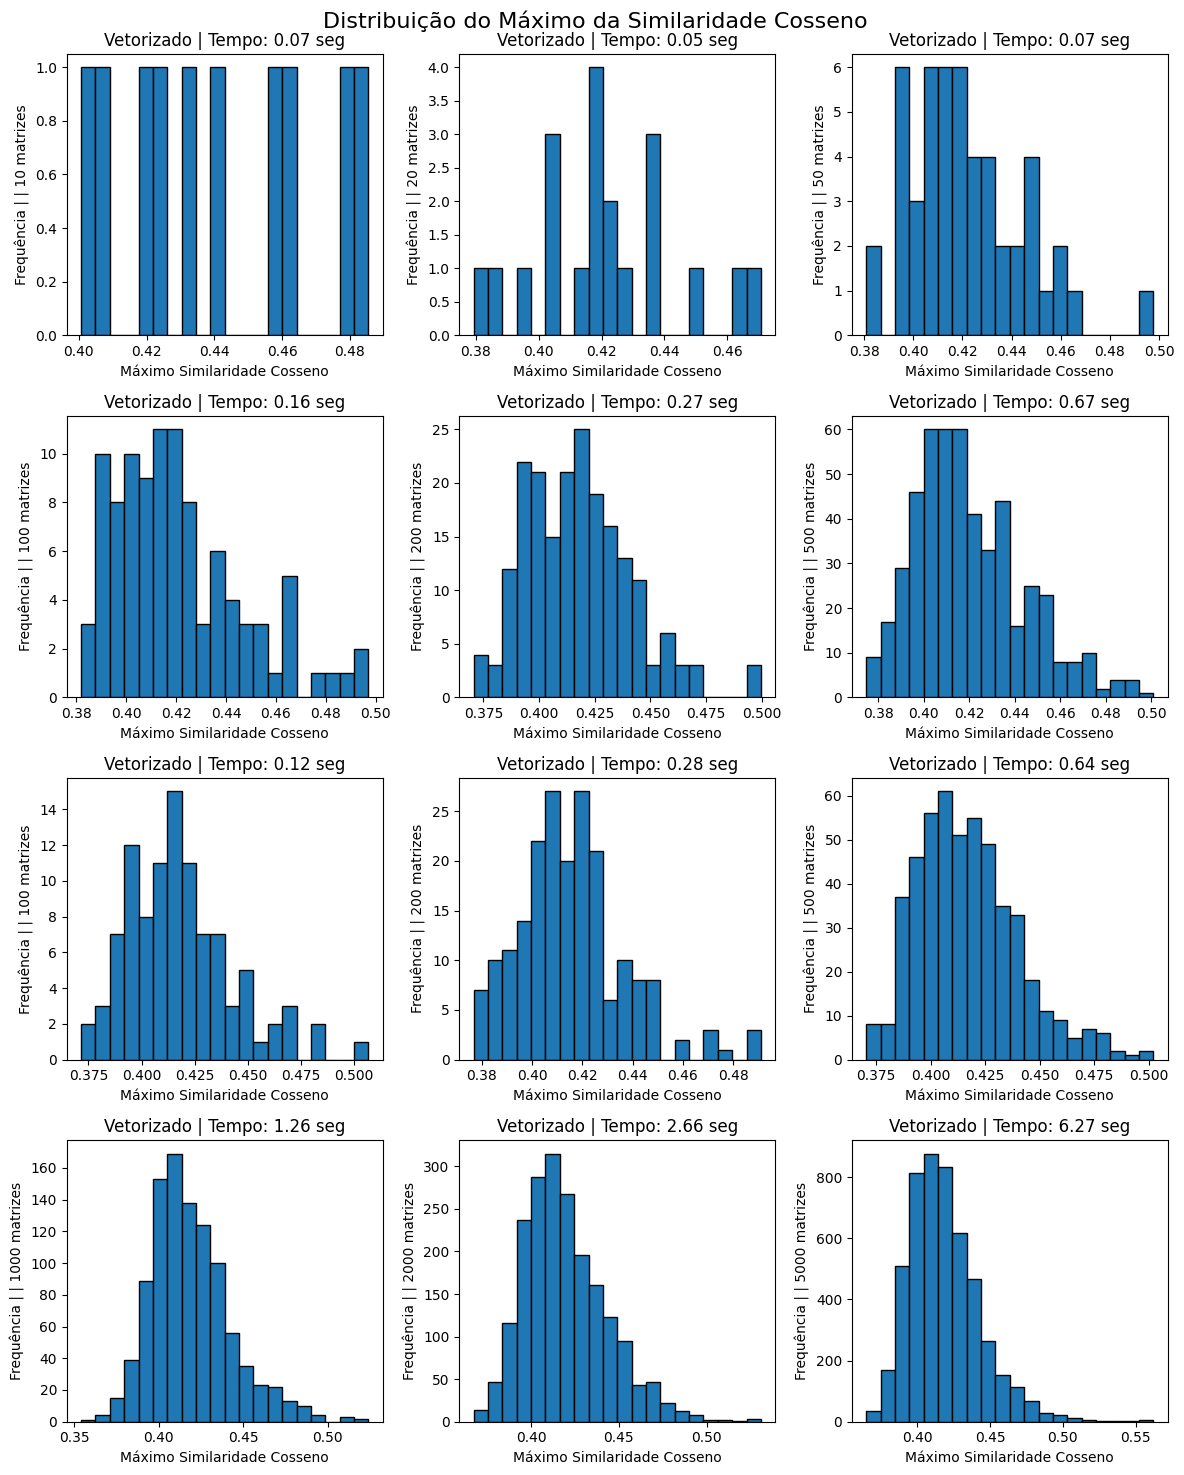

In [18]:
ks = [10, 20,50, 100, 200, 500, 100, 200, 500, 1000, 2000, 5000]

plt.figure(figsize=(12, 15))
i = 0

# < Método verotizado >
for k in ks:
    start = time.time()

    hist_max_ks_vec = []

    for _ in range(k):
        A = np.random.normal(0, 1, (100, 300))

        norms = np.linalg.norm(A, axis=0)
        A_normalizado = A / norms

        S = np.abs(A_normalizado.T @ A_normalizado)
        np.fill_diagonal(S, 0)

        hist_max_ks_vec.append(np.max(S))

    end = time.time()
    tempo_vec = end - start
    i += 1
    
    # Plota histograma
    plt.subplot(4, 3, i)
    plt.hist(hist_max_ks_vec, bins=20, edgecolor='black')
    plt.title(f"Vetorizado | Tempo: {tempo_vec:.2f} seg")
    plt.xlabel("Máximo Similaridade Cosseno")
    plt.ylabel(f"Frequência | | {k} matrizes")

plt.suptitle("Distribuição do Máximo da Similaridade Cosseno", fontsize=16)
plt.tight_layout()


In [ ]:
mn = [10000, 30000]

hist_max_i = []

A = np.random.normal(0, 1, mn)

norms = np.linalg.norm(A, axis=0)
A_normalizado = A / norms

S = np.abs(A_normalizado.T @ A_normalizado)
np.fill_diagonal(S, 0)

hist_max_i.append(np.max(S))


plt.hist(hist_max_i, bins=50, edgecolor='black')
plt.title(f"Matriz [10000, 30000]")
plt.xlabel("Máximo Similaridade Cosseno")
plt.ylabel(f"Frequência | | 1000 matrizes")

plt.suptitle("Distribuição do Máximo da Similaridade Cosseno", fontsize=16)
plt.tight_layout()


### e) A distribuição do máximo, parte 2. Escolha valores de K correspondentes e faça histogramas e comente os resultados para os seguintes pares de (m, n): (100, 100), (100, 300), (200, 200), (200, 600), (500, 500), (500, 1500), (1000, 1000), (1000, 3000).

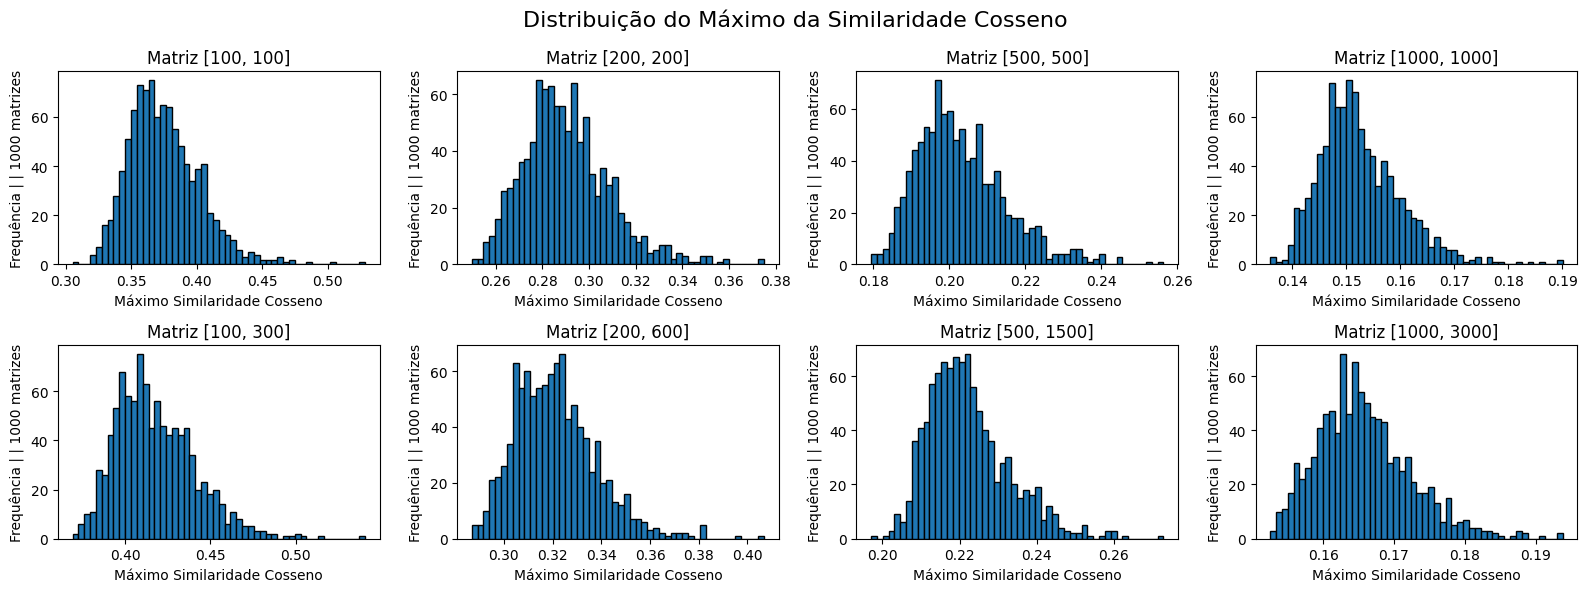

É possível ver que, à medida que o número de linhas aumenta, a moda do máximo diminui. Isso acontece pois, como as colunas são maiores, a probabilidade delas serem parecidas, isso é, o ângulo entre elas ser pequeno e o cosseno dele ser maior, diminui. Também conseguimos ver que, se compararmos uma matriz quadrada com uma matriz $[m, 3m]$, a moda do máximo é ligeiramenre maior para a $[m, 3m]$, pois a probabilidade de duas colunas serem semelhantes é maior

$x, y \sim \mathcal{N}(0, I_n)$

É possível observar que, à medida que o número de linhas $n$ aumenta (mantendo o número de colunas $m$ fixo), a moda do valor máximo de